In [17]:
import torchvision
import idx2numpy
from torchvision.datasets import MNIST 
from mlxtend.data import loadlocal_mnist
dataset=MNIST(root='D:/Downloads/' ,download=True)
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

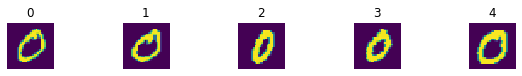

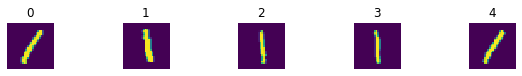

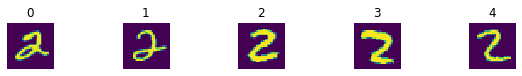

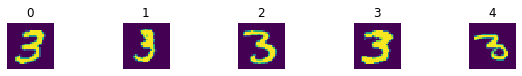

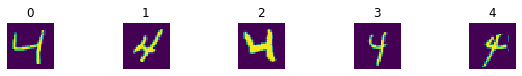

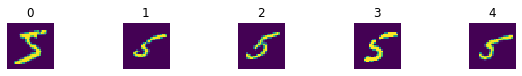

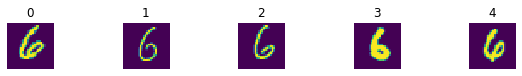

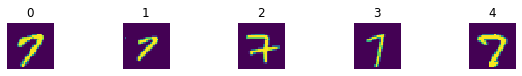

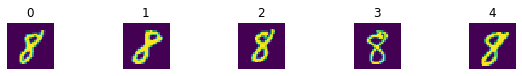

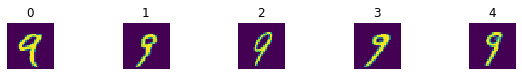

In [18]:
done=False
visualize={}
for i in range(10):
    visualize[i]=[]
start=0
while(not done):
    if(len(visualize[dataset[start][1]])<5):
        visualize[dataset[start][1]].append(dataset[start][0])
    curr=True
    for i in range(10):
        if(len(visualize[i])!=5):
            curr=False
    done=curr
    start+=1


for i in range(10):
    fig = plt.figure(figsize=(10,10))
    subplots=1
    for j in range(5):
        fig.add_subplot(10,5, subplots)
        plt.imshow(visualize[i][j])
        plt.axis('off')
        plt.title(j)
        subplots+=1

In [19]:
train_images,train_labels=loadlocal_mnist(images_path='D:/Downloads/MNIST/raw/train-images-idx3-ubyte', labels_path='D:/Downloads/MNIST/raw/train-labels-idx1-ubyte')
mean={}
cov={}
d=28*28
c=10
train_data={}
global_mean=np.zeros(d)

Sw=np.zeros((d,d))
Sb=np.zeros((d,d))

for i in range(c):
    train_data[i]=[]
    cov[i]=np.zeros((d,d))

for i in range(len(train_images)):
    train_data[train_labels[i]].append(train_images[i])

for i in range(c):
    mean[i]=np.mean(train_data[i],axis=0)
    
global_mean=np.mean(train_images,axis=0)

In [20]:
for i in range(c):
    temp=train_data[i]-mean[i]
    cov[i]=np.matmul(temp.T,temp)
    Sw=np.add(Sw,cov[i])
    train_data[i]=np.array(train_data[i])

St=np.matmul((train_images-global_mean).T, (train_images-global_mean))
Sb=St-Sw

In [21]:
invSw=np.linalg.pinv(Sw)
#psuedo inverse when inverse is not possible

finalMatrix=np.matmul(invSw,Sb)
eigenvalues,eigenvectors=np.linalg.eig(finalMatrix)

In [22]:
tosort=[(np.abs(eigenvalues[i]),eigenvectors[:,i]) for i in range(len(eigenvalues))]
tosort=sorted(tosort, key=lambda k: k[0], reverse=True)

In [23]:
W=[]
for i in range(c-1):    
    W.append(tosort[i][1])
    
W=np.array(W)
W=W.T

In [24]:
Y=np.dot(W.T, train_images.T)
Y=np.real(Y)
Y=Y.T

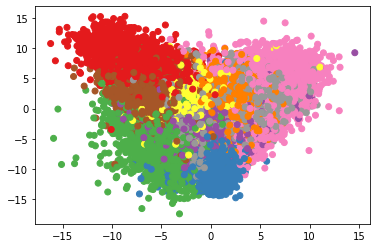

In [25]:
plt.scatter(Y[:,0], Y[:,1], c=train_labels, cmap=plt.cm.Set1)
plt.show()

In [26]:
def discriminant(cov, mean,point):
    return(-0.5*np.matmul((point-mean).T,np.matmul(np.linalg.inv(cov),point-mean))-0.5*np.log(abs(np.linalg.det(cov))))

In [27]:
projected_mean={}
projected_train_data={}
new_covariance={}

dbgvari=0
for i in range(c):
    
    projected_mean[i]=np.matmul(W.T,mean[i])
    temporary=np.zeros((c-1,1))
    
    for k in range(len(projected_mean[i])):
        temporary[k]=projected_mean[i][k]
    
    projected_mean[i]=temporary

    
    new_covariance[i]=np.zeros((c-1,c-1))
    X=train_data[i].T
    projected_train_data[i]=np.matmul(W.T,X)
    
    tempo=projected_train_data[i].T
    
    dbgvari+=tempo.shape[1]
    currvari=0

    for j in tempo:
        
        curr=np.array(j)
        curr=np.reshape(curr,(c-1,1))
        x=np.subtract(curr,projected_mean[i])
        
        y=np.matmul(x,x.T)
        
        new_covariance[i]=np.add(new_covariance[i],y)
        currvari+=1
    
    new_covariance[i]/=len(train_data[i]-1)
    print("Done with "+str(i))
        

c:\users\bhavya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


Done with 0
Done with 1
Done with 2
Done with 3
Done with 4
Done with 5
Done with 6
Done with 7
Done with 8
Done with 9


In [28]:
correctly_classified=0
classwise_correct={}
for i in range(c):
    classwise_correct[i]=0
    
test_points,test_labels = loadlocal_mnist(images_path='D:/Downloads/MNIST/raw/t10k-images-idx3-ubyte', labels_path='D:/Downloads/MNIST/raw/t10k-labels-idx1-ubyte')


proj_test=np.matmul(W.T,test_points.T)
proj_test=proj_test.T
proj_test=np.real(proj_test)
for i in range(len(test_points)):
    max_discriminant=-1000000000
    class_is=-1
    if(i%1000==0):
        print(i)
        
    
    for j in range(c):
        xii=np.reshape(proj_test[i],(c-1,1))
        
        checking=discriminant(new_covariance[j],projected_mean[j],xii)
        if(max_discriminant<checking[0][0]):
            max_discriminant=checking
            class_is=j
    
    if(class_is==test_labels[i]):
        correctly_classified+=1
        classwise_correct[test_labels[i]]+=1
        
for i in range(c):
    dbg_vari=classwise_correct[i]
    print("Classwise correct of "+str(i)+" is: "+str(dbg_vari))

print("OVERALL ACCURACY = "+str(100*correctly_classified/len(test_points)))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Classwise correct of 0 is: 951
Classwise correct of 1 is: 1071
Classwise correct of 2 is: 914
Classwise correct of 3 is: 883
Classwise correct of 4 is: 889
Classwise correct of 5 is: 748
Classwise correct of 6 is: 895
Classwise correct of 7 is: 908
Classwise correct of 8 is: 821
Classwise correct of 9 is: 870
OVERALL ACCURACY = 89.5
